
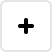
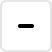
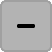
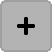
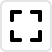
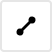
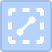
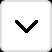
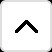
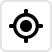

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()

In [2]:
%run data_gen.py

# TESTS FOR *geom_density()* #

In [3]:
def get_grid_bunch(plots, plot_width=400, plot_height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        bunch.add_plot(plots[i], (i % columns) * plot_width, int(i / columns) * plot_height, plot_width, plot_height)
    return bunch

In [4]:
n = 10000
m = 5
N = 100

df = pd.DataFrame(generate_data(n, m))

df

A         B         C         D         E         X         Y  a  \
0    -1.352407 -2.744358  0.452372  0.707915 -0.585757  2.943865  3.150531  4   
1    -0.790509  0.495780  0.064007  0.120897  2.747926 -2.479022  5.202050  0   
2     2.311374  0.385547 -1.760554  5.222314 -1.404806 -0.583229  1.240362  2   
3     2.917596 -0.593106  2.027744  1.977597  0.140790 -2.897156  9.040111  3   
4    -1.281555 -1.474681  1.006450  0.712333 -1.055244 -0.492854 -0.233137  0   
...        ...       ...       ...       ...       ...       ...       ... ..   
9995 -0.454495 -0.295862  2.211311  0.265709  1.741783 -1.273134  2.529095  1   
9996 -0.648152 -1.151492 -3.085836  1.435515  3.442932 -0.136911  2.167161  3   
9997  0.219416  3.980156 -2.270782  4.178824 -0.372437 -2.330236  5.817270  3   
9998  0.630215  0.140032 -0.032038  0.748627  2.809535 -1.505998  0.133288  1   
9999  2.132494 -0.266628  1.126663  0.247836 -2.226188 -2.662634  5.546735  2   

      b  c         x         y  
0     1  2  0.172853  0.000000  
1     2  0  0.571139  0.000359  
2     4  0  0.635338  0.000798  
3     0  2  0.749486  0.001413  
4     1  0  0.294672  0.000741  
...  .. ..       ...       ...  
9995  1  0  0.165191 -0.000519  
9996  2  5  0.270755 -0.000680  
9997  4  1  0.528320 -0.000996  
9998  4  0  0.345994 -0.000435  
9999  0  0  0.707105 -0.000444  

[10000 rows x 12 columns]

In [5]:
ggplot(df, aes('A')) + \
    geom_density(color='red') + \
    geom_density(bw=0.1, color='blue') + \
    geom_density(adjust=0.2, color='green')

In [6]:
COLORS = [ 'red', 'cyan', 'magenta', 'green', 'black', 'orange', 'blue' ]
KERNELS = [ 'gaussian', 'cosine', 'optcosine', 'rectangular', 'triangular', 'biweight', 'epanechikov' ]
plots = [ ]
for i in range(len(KERNELS) - 1):
    plots.append(
        ggplot(df, aes('A')) + \
        geom_density(kernel=KERNELS[i], color=COLORS[i], n=N) + \
        geom_density(kernel=KERNELS[i + 1], color=COLORS[i + 1], n=N)
    )
bunch = get_grid_bunch(plots, 300, 250)
bunch.show()

In [7]:
plots = [ ]
plots.append(ggplot(df) + geom_density(aes(x='A', group='a', alpha='a'), color='black', fill='blue', n=N))
plots.append(ggplot(df) + geom_density(aes(x='A', group='a', color='a'), n=N) + scale_color_discrete())
plots.append(ggplot(df) + geom_density(aes(x='A', group='a', fill='a'), color='black', n=N) + scale_fill_discrete())
plots.append(ggplot(df) + geom_density(aes(x='A', group='a', linetype='a'), color='black', n=N))
plots.append(ggplot(df) + geom_density(aes(x='A', group='a', size='a', color='a'), n=N) + \
             scale_color_discrete(name=''))
bunch = get_grid_bunch(plots, 300, 250)
bunch.show()

In [8]:
ggplot(df, aes('A', group='a', color='a')) + geom_density(show_legend=False, stat='bin', n=N)

In [9]:
ggplot() + geom_density(data=df, mapping=aes('B'), position=position_jitter(width=2, height=2), 
                        sampling=sampling_random(100))

In [10]:
ggplot(df, aes('A', group='a', color='a')) + geom_area_ridges()

In [11]:
from lets_plot.bistro.residual import *
residual_plot(df, 'A', 'B')

In [12]:
residual_plot(df, 'A', 'B') + coord_flip()